reference: https://medium.com/@ibjects/imdb-dataset-visualization-data-analytics-using-pandas-97b5c6f03c6d
<br>data from: https://github.com/thechaudharysab/imdb-data-pandas-visualization/blob/master/data/imdb_1000.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
imdb_data = 'imdb_1000.csv'
data = pd.read_csv(imdb_data)
data.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [9]:
data.shape

(979, 6)

In [11]:
data.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [12]:
data['duration'].mean()

120.97957099080695

In [13]:
data.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


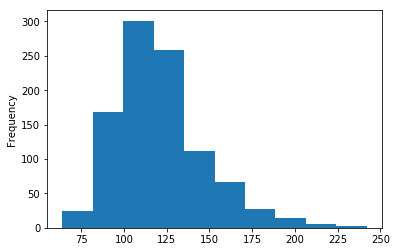

In [14]:
data['duration'].plot(kind='hist', bins=10)

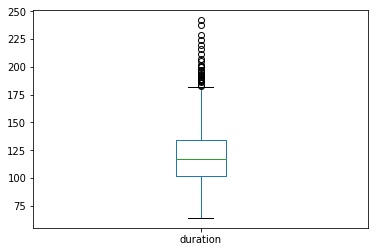

In [15]:
data['duration'].plot(kind='box')

In [18]:
jumlah_per_rating = data[['content_rating', 'title']].groupby('content_rating').count()
jumlah_per_rating

,title
content_rating,
APPROVED,47
G,32
GP,3
NC-17,7
NOT RATED,65
PASSED,7
PG,123
PG-13,189
R,460


Text(0, 0.5, 'Title Count')

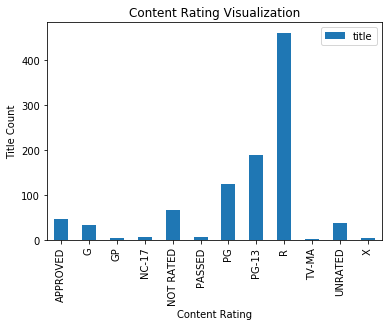

In [19]:
jumlah_per_rating.plot(kind='bar', title='Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

In [20]:
data['content_rating'].replace(['X', 'TV_MA'], 'NC-17').head()

0        R
1        R
2        R
3    PG-13
4        R
Name: content_rating, dtype: object

Text(0, 0.5, 'Title Count')

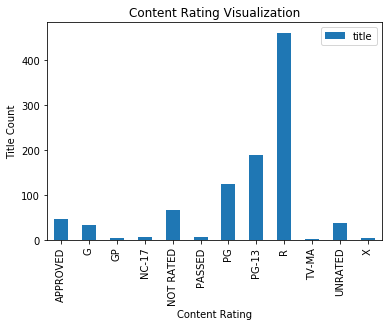

In [21]:
jumlah_per_rating.plot(kind='bar', title='Content Rating Visualization')
plt.xlabel('Content Rating')
plt.ylabel('Title Count')

In [22]:
data[data['content_rating'].isnull()]
data.at[(187,649), 'content_rating'] = 'PG'
data.at[936, 'content_rating'] = 'PG-13'

In [23]:
print('Avg.star rating for movies 2 hours or longer: ', data[data['duration'] >= 120]['star_rating'].mean(), '\nAvg. star rating for movies shorter than 2 hours: ', data[data['duration']<120]['star_rating'].mean())

Avg.star rating for movies 2 hours or longer:  7.948898678414082 
Avg. star rating for movies shorter than 2 hours:  7.838666666666657


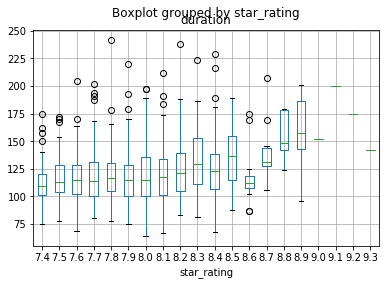

In [24]:
data.boxplot(column='duration', by='star_rating')

In [25]:
data[['duration', 'genre']].groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


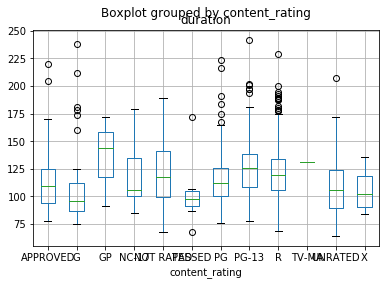

In [26]:
data.boxplot(column='duration', by='content_rating')

In [27]:
data.sort_values('star_rating', ascending=False).groupby('genre')['title', 'star_rating'].first()

,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Modern Times,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


In [28]:
result = data[data['title'].isin(data[data.duplicated(['title'])]['title'])]
result.sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [29]:
genres = data['genre'].value_counts()[data['genre'].value_counts()>10].index
data[data['genre'].isin(genres)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [34]:
def repp(string):
    return string.replace("[","").replace("]","").replace("u'","").replace("',",",")[:-1]

movies_series = data['actors_list'].apply(repp)

actors_list = []
for movie_actors in movies_series:
    actors_list.append([e.strip() for e in movie_actors.split(',')])
    
actor_dict = {}
for actor in actors_list:
    for a in actor:
        if a in actor_dict:
            actor_dict[a] +=1
        else:
            actor_dict[a] =1
actor_dict

{'Tim Robbins': 5,
 'Morgan Freeman': 8,
 'Bob Gunton': 1,
 'Marlon Brando': 4,
 'Al Pacino': 13,
 'James Caan': 2,
 'Robert De Niro': 18,
 'Robert Duvall': 7,
 'Christian Bale': 11,
 'Heath Ledger': 2,
 'Aaron Eckhart': 2,
 'John Travolta': 1,
 'Uma Thurman': 5,
 'Samuel L. Jackson': 6,
 'Henry Fonda': 3,
 'Lee J. Cobb': 2,
 'Martin Balsam': 1,
 'Clint Eastwood': 14,
 'Eli Wallach': 1,
 'Lee Van Cleef': 2,
 'Elijah Wood': 5,
 'Viggo Mortensen': 4,
 'Ian McKellen': 8,
 'Liam Neeson': 5,
 'Ralph Fiennes': 7,
 'Ben Kingsley': 4,
 'Brad Pitt': 14,
 'Edward Norton': 7,
 'Helena Bonham Carter': 4,
 'Orlando Bloom': 2,
 'Leonardo DiCaprio': 11,
 'Joseph Gordon-Levitt': 6,
 'Ellen Page': 2,
 'Mark Hamill': 3,
 'Harrison Ford': 10,
 'Carrie Fisher': 4,
 'Tom Hanks': 14,
 'Robin Wright': 3,
 'Gary Sinise': 2,
 'Matthew McConaughey': 4,
 'Anne Hathaway': 3,
 'Jessica Chastain': 3,
 'Jack Nicholson': 9,
 'Louise Fletcher': 1,
 'Michael Berryman': 1,
 'Toshir\\xf4 Mifune': 3,
 'Takashi Shimura': 2